 <h1>The Problem</h1>

How to increase happiness level?
In this experiment, the happiness level is measured by the happiness score. The experiment is aiming at finding out how the factors in dataset affect the happiness scores. 
Data can be found at:
https://www.kaggle.com/unsdsn/world-happiness

<h1>Potential Solution</h1>

1. GDP will positively influence the happiness score.
2. Freedom will positively influence the happiness score.
2. Life Expectancy will positively influence the happiness score.

<h1>The method of testing the solution</h1>

Design surveys that covers all information needed to build the dataset/do the calculation.

Randomly select equal number of people from each country, select same number/% population of people from each group aged 0-10,10-20,20-30, 30-40,40-50,50-60,60-70,70-80,>80. Make sure the numbers of male and female are equal. 

After the samples are selected, ask them to do the survey, survey should be completed within the same time, the format should be diversified (electronic/paper copies).

The first phase do 10% of them to see how the data goes, then do another 50%, finally 40%.

Collect the results and complete the dataset.



In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE

%matplotlib inline
df = pd.read_csv('/Users/zhangtong/Downloads/world-happiness-report/2017.csv')
df.head()



,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


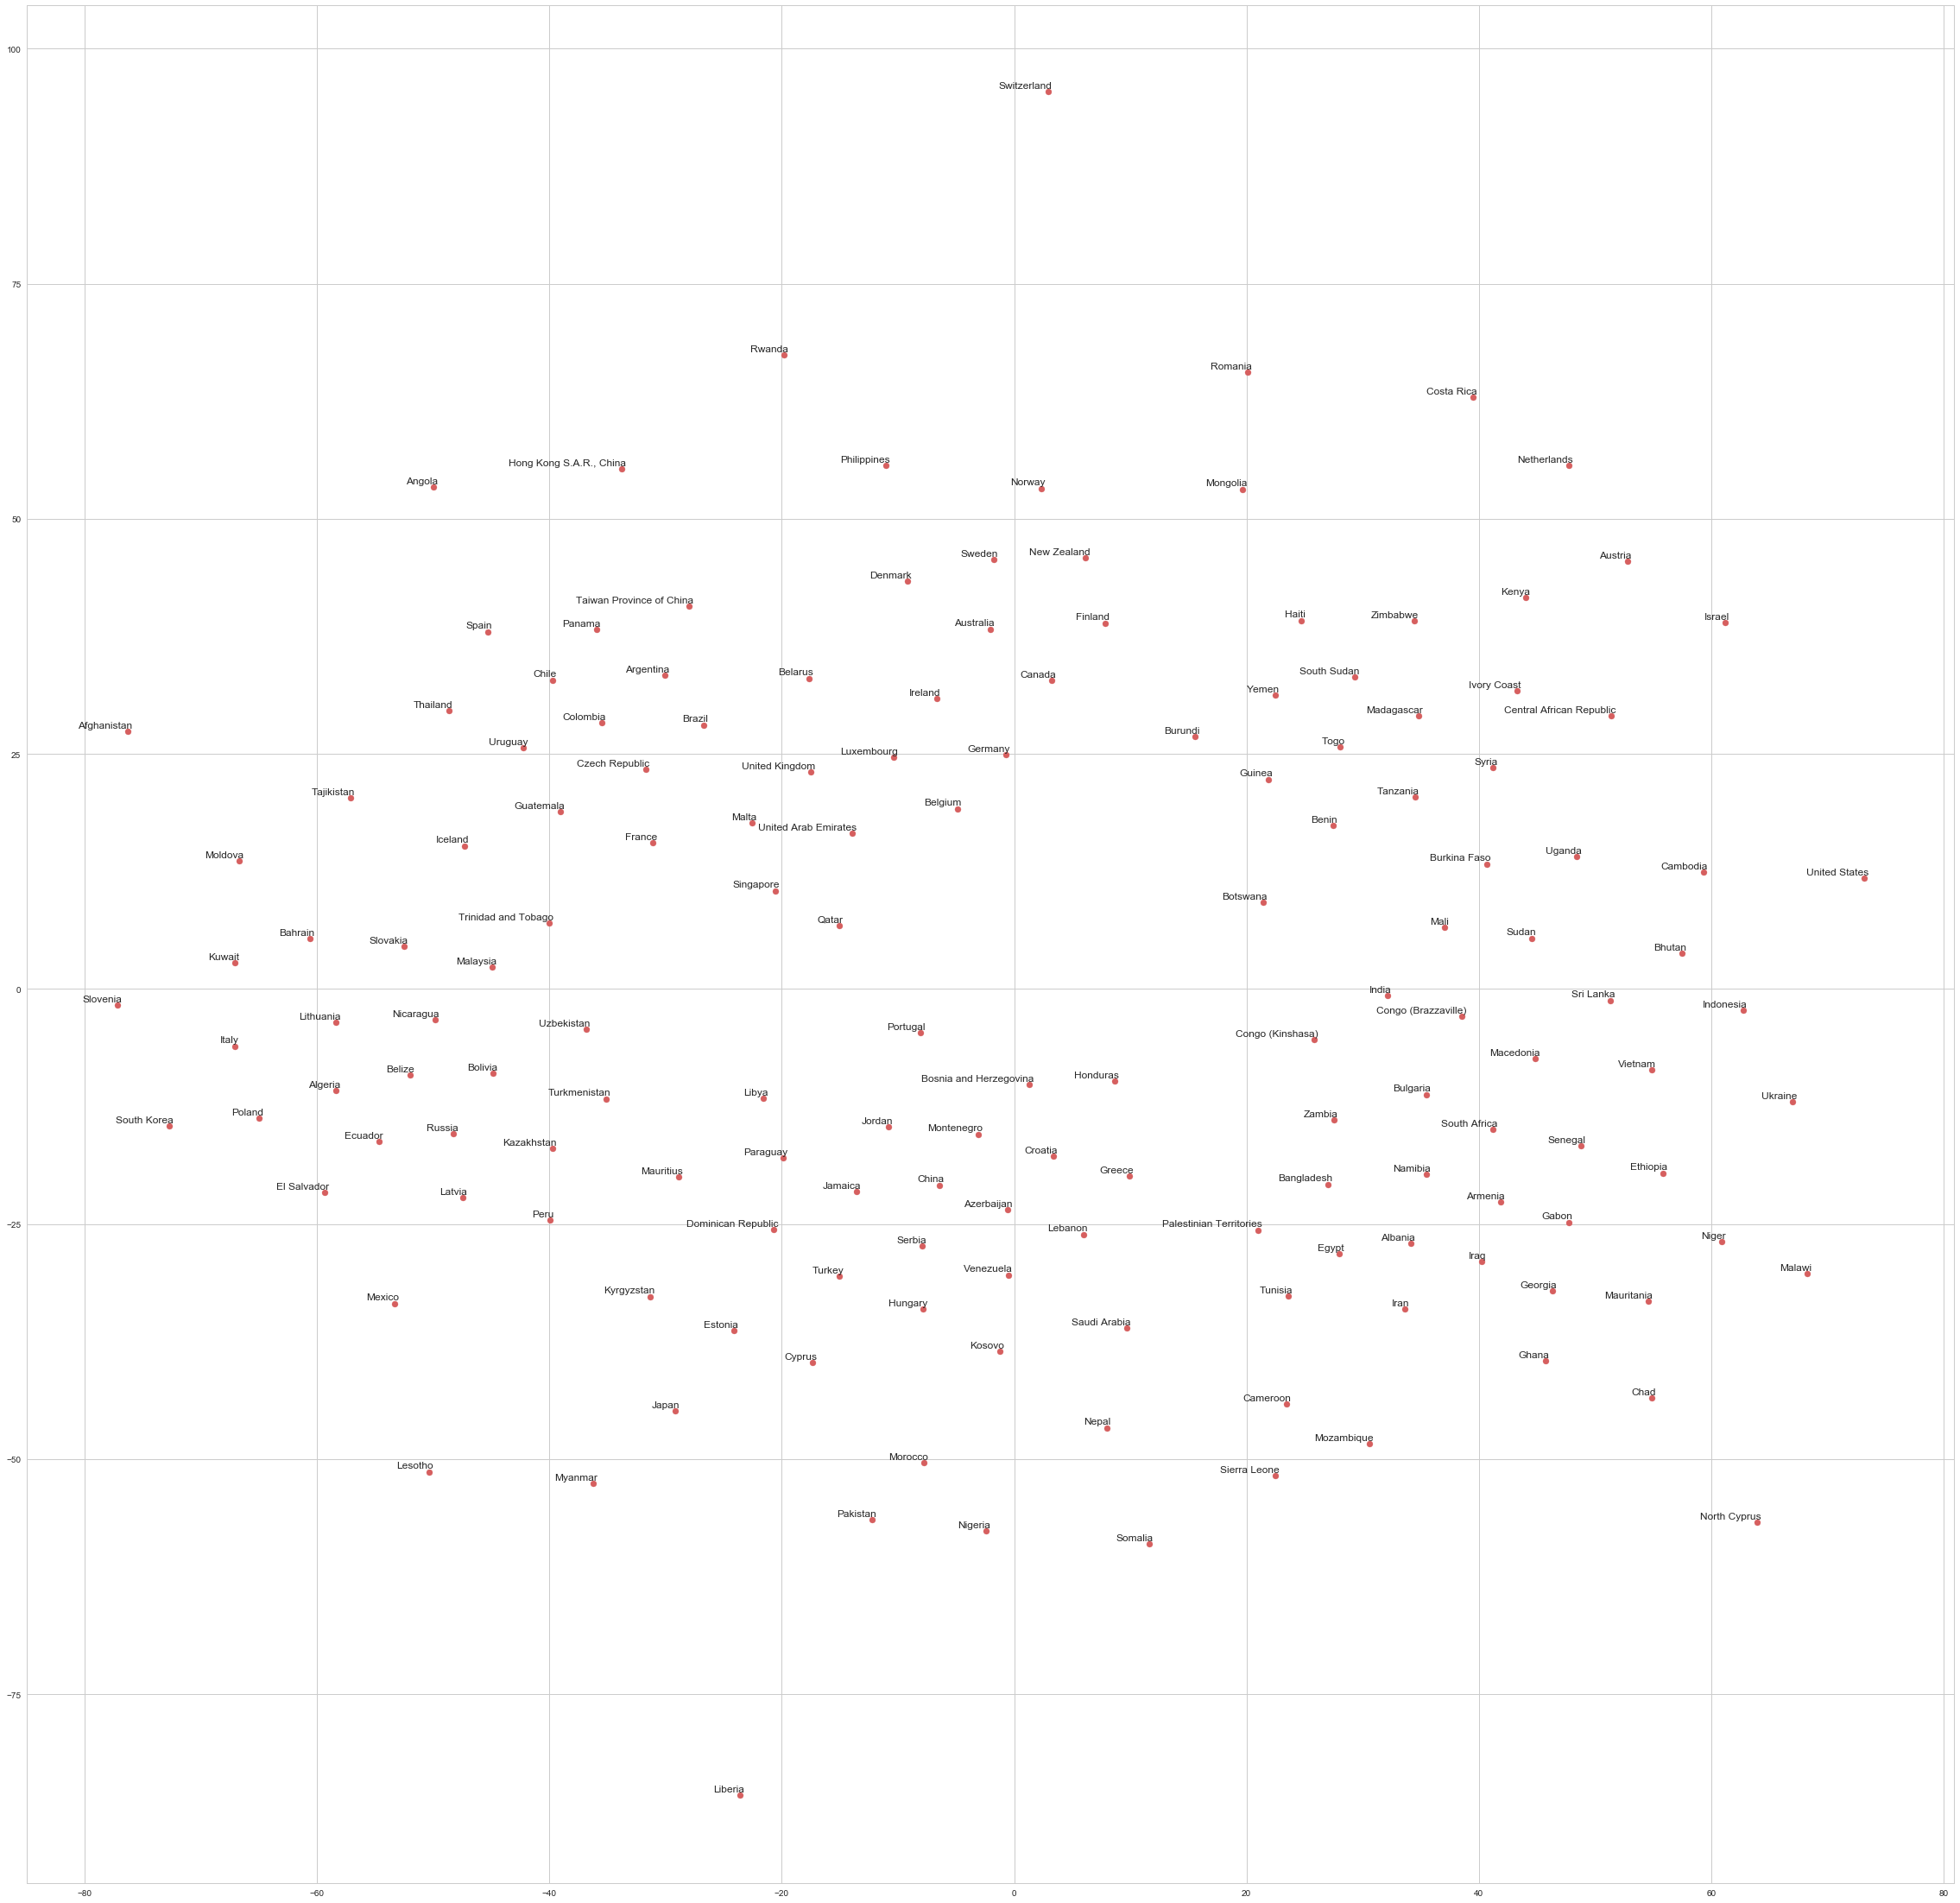

In [35]:
sns.set(style="whitegrid", palette="muted")
current_palette = sns.color_palette()
X = df.ix[:, 2:].values
X = TSNE(n_components = 2).fit_transform(X)
Y = df.ix[:, 0].values

fig = plt.figure(figsize=(40,40))

for i, label in enumerate(Y):
    x, y = X[i, :]
    plt.scatter(x, y, color = current_palette[2])
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
    
plt.show()

In [36]:
df_2017 = pd.read_csv('/Users/zhangtong/Downloads/world-happiness-report/2017.csv')
df_2016 = pd.read_csv('/Users/zhangtong/Downloads/world-happiness-report/2016.csv')

df_2017 = df_2017.loc[df_2017['Country'] == 'Malaysia']
df_2016 = df_2016.loc[df_2016['Country'] == 'Malaysia']

df_2017 = df_2017.ix[:, 6:]
df_2016 = df_2016.ix[:, 5:]

columns = tuple(df_2017.dtypes.index)

df_2016 = df_2016.ix[:, :].values
df_2017 = df_2017.ix[:, :].values


In [40]:
data_2016 = pd.read_csv('/Users/zhangtong/Downloads/world-happiness-report/2016.csv')
data_2015 = pd.read_csv('/Users/zhangtong/Downloads/world-happiness-report/2015.csv')

data_2016 = data_2016.loc[data_2016['Country'] == 'China']
data_2015 = data_2015.loc[data_2015['Country'] == 'China']

data_2016 = data_2016.ix[:, 6:]
data_2015 = data_2015.ix[:, 5:]

columns = tuple(data_2016.dtypes.index)

data_2015 = data_2015.ix[:, :].values
data_2016 = data_2016.ix[:, :].values


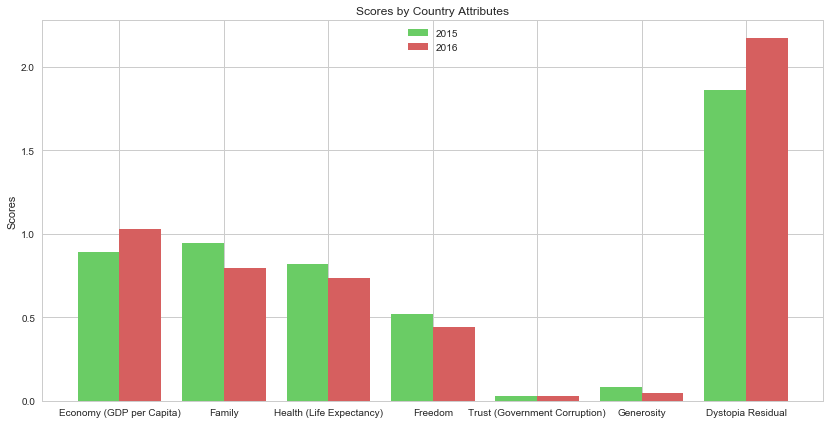

In [41]:
N = data_2015[0, :].shape[0]

from pylab import rcParams
rcParams['figure.figsize'] = 14, 7

ind = np.arange(N)
width = 0.4
fig, ax = plt.subplots()

bar1 = ax.bar(ind, data_2015[0, :].tolist(), width, color = current_palette[1])
bar2 = ax.bar(ind + width, data_2016[0, :].tolist(), width, color = current_palette[2])

ax.set_ylabel('Scores')
ax.set_title('Scores by Country Attributes')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(columns)

ax.legend((bar1[0], bar2[0]), ('2015', '2016'), loc='upper center')

plt.show()